## Validando base de dados com Regex

Imagine que você possui uma base de dados e precisa migrar para outro banco de dados, mas antes disso você precisa verificar se os dados estão alinhados aos requisitos do banco que irá recebê-los, como tipo, tamanho e se é obrigatório o preenchimento. 

Este projeto apresenta uma forma de validar, limpar e baixar os dados para importar em outro sistema. 

### 1_Dicionário de dados

* Conforme o arquivo ‘input_dict.csv’, na primeira coluna você digita o nome das colunas apresentadas no arquivo de 'input_validaDados.csv'.

* Insira na segunda coluna o nome técnico, descrito no banco de dados do sistema que irá receber os dados.

* Na terceira coluna deve ser inserido o tamanho máximo que o dado deve ter.

* Considerando que você já possui o código Regex da validação, insira na quarta coluna.

* Na última coluna deve ser informado se o campo é obrigatório ou não.


### 2_Carregar dependências

Considerando que você já possui o arquivo com os dados que serão validados (input_validaDados.csv) e seu dicionário (input_dict.csv), o código abaixo demonstra como carregá-los no projeto, assim como as bibliotecas necessárias.





In [16]:
# Carregar dependências
import re
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt


# Lista para receber as linhas do arquivo
try:
    file_input_paraValidar = open("..\\regex_validaDataset\\input\\input_validaDados_youtube.csv", "r", encoding="utf-8")
    input_paraValidar = list(csv.reader(file_input_paraValidar, delimiter="|"))
    file_input_paraValidar.close()
except IOError:
    pass

# Carregar dicionário
try:
    input_dict = pd.read_csv(
        '..\\regex_validaDataset\\input\\input_dict_youtube.csv',
        ";",
        header=None,
        index_col=0,
        squeeze=True,
    ).to_dict()
except IOError:
    pass

C:\Users\jeanB\AppData\Local\Temp\ipykernel_20844\2317591908.py:19: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  input_dict = pd.read_csv(
C:\Users\jeanB\AppData\Local\Temp\ipykernel_20844\2317591908.py:19: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  input_dict = pd.read_csv(


### 3_Validar Campos

É necessário que os campos apresentados em 'input_validaDados.csv' estejam contidos em 'input_dict.csv', se o nome de todas as colunas forem correspondidos, o código abaixo irá imprimir uma mensagem de sucesso. 

Para cada coluna não contida, o código abaixo vai imprimir o nome com a mensagem de erro.

Esta correspondência é crucial, se estiver incompleta irá interromper o fluxo de validação.



In [17]:
# Limpar espaço em branco no nome das colunas, se houver
colunas = [i.strip() for i in input_paraValidar[0]] 

noMacth = 0 # Contador de colunas não correspondidas

# Para cada item não encontrado, imprimir
# Se todos os itens for encontrados, imprimir mensagem de sucesso
for i in colunas:
  try:
    input_dict[1][i]
  except KeyError:
    noMacth += 1 
    print('Erro, não encontrado (' + str(i) + ')')
    pass

if noMacth == 0:
  print('Sucesso, dados correspondidos!\nPode avançar!')

Sucesso, dados correspondidos!
Pode avançar!


### 4_Preparar dados

Nesta etapa os dados são limpos de espaço em branco, se houver, e dados ausentes serão substituidos por 'VAZIO'.

Em seguida os dados são salvos na lista 'input_paraValidar_limpo'.

Para visualizar as alterações, os dados se apresentam no dataframe 'df_input_paraValidar_limpo', no qual apresenta as colunas com nome técnico e dispôe da opção de download.

In [18]:
# Lista para receber valores vazios
input_paraValidar_limpo = [] 

# Substituir valores vazios
for i in input_paraValidar:
    input_paraValidar_limpo.append(["VAZIO" if x == '' else x.strip() for x in i])

df_input_paraValidar_limpo = pd.DataFrame(input_paraValidar_limpo) # Converter listas em dataframe

df_input_paraValidar_limpo = df_input_paraValidar_limpo.loc[:, df_input_paraValidar_limpo.notnull().all()] # Excluir colunas 'None'

# Substituir o nome das colunas pelo nome técnico e salvar na lista 'coluna_tec'
coluna_tec = []

for i in df_input_paraValidar_limpo.iloc[0]:
    coluna_tec.append(input_dict[1][i])


df_input_paraValidar_limpo = df_input_paraValidar_limpo[1:] # Pegar os dados menos a primeira linha (cabeçalho)

df_input_paraValidar_limpo.columns = coluna_tec # Definir a linha de cabeçalho

df_input_paraValidar_limpo # Exibir dataframe

# Para baixar 'df_input_paraValidar_limpo':
# df_input_paraValidar_limpo.to_csv('..\\regex_validaDataset\\output\\df_input_paraValidar_limpo.csv', index=False)

,CHANNEL_ID,VIDEO_CATEGORY_ID,CHANNEL_VIEW_COUNT,VIDEO_COUNT,SUBSCRIBER_COUNT,VIDEO_ID,CHANNEL_COMMENT_COUNT,VIDEO_VIEW_COUNT,VIDEO_LIKE_COUNT,VIDEO_DISLIKE_COUNT,VIDEO_PUBLISHED,VIDEO_COMMENT_COUNT
1,UCdzU3DSGzyWzN2118yd9X9g,22,14654,30,18,--DwgB78t-c,1,1712,10,1,19/01/2012 16:38,0
2,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,51,184,--NZRkXBV7k,8,10916,44,3,30/03/2015 01:04,2
3,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,72,338,--hoQ2sGG4M,5,3478,8,1,07/08/2009 03:51,2
4,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,172,22051,--sBoaqBlzA,74,19497,161,6,03/08/2011 22:07,10
5,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,2777,220,--7h1S4neDM,0,2201,1,0,29/04/2014 12:44,0
...,...,...,...,...,...,...,...,...,...,...,...,...
575606,UCoBsEPCif0cJr0XoH9vKVsA,10,25342567,3783,7270,2YwZKSyX5Pg,105,18742,86,2,01/02/2012 02:01,10
575607,UC2AFyZm1gI81faexxhq5Mzg,2,30599,15,3,2Y8Rtvd8cHc,0,14967,7,2,25/01/2007 12:38,-1
575608,UCXRQyRCOq8SwupXXqQ3mgAA,28,103855,61,22,2YhOrl3fzCM,1,6092,5,9,10/01/2013 05:20,1
575609,UCtWqVyrfT_CrVeNx0UM4RjQ,24,363927,258,187,2Y3a5eS_q2s,3,1932,13,1,20/05/2013 15:33,4


### 5_Tratar dados

Caso considere tratar os dados, segue abaixo exemplos para aplicar as alterações e efetuar download dos dados.

In [19]:
# Para tratar dados, identifique o número da coluna e execute a operação
# Vede exemplos abaixo


# # Verificar valor do dado
# for i in input_paraValidar_limpo:
#     if i[0] == 'VAZIO':
#         i[0] = 'NULL'

# # Verificar se o dado contém determinado valor
# for i in input_paraValidar_limpo:
#     if 'VAZIO' in i[0]:
#         i[0] = 'NULL'

# # Verificar se o dado não contém determinado valor
# for i in input_paraValidar_limpo:
#     if 'VAZIO' not in i[0]:
#         i[0] = 'NULL'

# # Combinar condições
# for i in input_paraValidar_limpo:
#     if '201801' not in i[4] and '30' in i[5]:
#         i[0] = '999'


# df_input_tratado = pd.DataFrame(input_paraValidar_limpo)

# new_header_dfTratado = df_input_tratado.iloc[0] # Pegar a primeira linha para o cabeçalho
# df_input_tratado = df_input_tratado[1:] # Pegar os dados menos a linha de cabeçalho
# df_input_tratado.columns = new_header_dfTratado # Definir a linha de cabeçalho como o cabeçalho df

# df_input_tratado # Exibir dataframe

# Para baixar df_input_tratado:
# df_input_tratado.to_csv('..\\regex_validaDataset\\output\\df_input_tratado.csv', index=False)

### 6_Adicionar número da linha

O código abaixo adiciona o número da linha, para facilitar a identificação do dado conforme será visto posteriormente.

In [20]:
# Variável para gravar o número da linha do dado
countLinha = 0

# Remove cabeçalho
input_paraValidar_limpo.pop(0)

# Adicionar número da linha
for i in input_paraValidar_limpo:
    i.append(countLinha)
    countLinha = countLinha + 1

### 7_Validar dados

O código abaixo valida os dados e salva na lista 'check_list'. As validações possíveis são:


* 'vazio_naoObrigatorio' quando o dado é igual a 'VAZIO' mas seu preenchimento não é obrigatório.

* 'vazio_obrigatorio' quando o dado é igual a 'VAZIO' e seu preenchimento é obrigatório.

* 'foraDoTamanho_obrigatorio' quando o dado está fora do tamanho determinado e é de preenchimento obrigatório.

* 'foraDoTamanho_naoObrigatorio' quando o dado está fora do tamanho determinado e não é de preenchimento obrigatório.

* 'aprovado' quando o dado estiver dentro do tamanho determinado e for validado pelo regex.

* 'reprovado' quando o dado não tiver sido classificado pelas validações anteriores.



Em seguida os dados são salvos no dataframe 'df', tem as colunas renomeadas, exibe os dados e está disponível para download.

In [21]:
# Validar dados e salvar resultados em dataframe

check_list = []

for i, row in enumerate(input_paraValidar_limpo):
    for j, column in enumerate(colunas):
        coluna, dado = column, row[j]
        coluna_len, regex_cod, campo_obrigatorio = input_dict[2][column], input_dict[3][column], input_dict[4][column]

        if dado == 'VAZIO':
            dado_validado = 'vazio_naoObrigatorio' if campo_obrigatorio == 'N' else 'vazio_obrigatorio'
        elif len(dado) > coluna_len:
            dado_validado = 'foraDoTamanho_obrigatorio' if campo_obrigatorio == 'Y' else 'foraDoTamanho_naoObrigatorio'
        elif len(dado) <= coluna_len and re.match(regex_cod, dado):
            dado_validado = 'aprovado'
        else:
            dado_validado = 'reprovado'

        # Adicionar dados('coluna', 'colunaTec', 'linha', 'dado', 'regexCod', 'tamanhoMaximo', 'campoObrigatorio', 'status')
        check_list.append([coluna, input_dict[1][coluna], i, dado, regex_cod, coluna_len, campo_obrigatorio, dado_validado])

# Transformar lista em dataframe
df = pd.DataFrame(check_list)

# Nomear colunas
df = df.rename(
    columns={0: 'coluna', 1: 'colunaTec', 2: 'linha', 3: 'dado', 4: 'regexCod', 5: 'tamanhoMaximo', 6: 'campoObrigatorio', 7: 'status'})  

df

# df.to_csv('..\\regex_validaDataset\\output\\df_output.csv', index=False)


,coluna,colunaTec,linha,dado,regexCod,tamanhoMaximo,campoObrigatorio,status
0,channelId,CHANNEL_ID,0,UCdzU3DSGzyWzN2118yd9X9g,^(.*)$,24,Y,aprovado
1,videoCategoryId,VIDEO_CATEGORY_ID,0,22,^([1-9]{1}([0-9]{1})?)$,2,Y,aprovado
2,channelViewCount,CHANNEL_VIEW_COUNT,0,14654,"^([1-9]{1}([0-9]{1,9})?)$",10,Y,aprovado
3,videoCount,VIDEO_COUNT,0,30,"^([1-9]{1}([0-9]{1,4})?)$",5,Y,aprovado
4,subscriberCount,SUBSCRIBER_COUNT,0,18,"^([1-9]{1}([0-9]{1,6})?)$",7,NaN,aprovado
...,...,...,...,...,...,...,...,...
6907315,videoViewCount,VIDEO_VIEW_COUNT,575609,41962,"^([1-9]{1}([0-9]{1,7})?)$",8,Y,aprovado
6907316,videoLikeCount,VIDEO_LIKE_COUNT,575609,593,"^([1-9]{1}([0-9]{1,5})?)$",6,N,aprovado
6907317,videoDislikeCount,VIDEO_DISLIKE_COUNT,575609,48,"^([1-9]{1}([0-9]{1,4})?)$",5,N,aprovado
6907318,videoPublished,VIDEO_PUBLISHED,575609,21/05/2012 02:57,^(0[1-9]|[12][0-9]|3[01])\/(0[1-9]|1[0-2])\/(1...,16,Y,aprovado


### 8_Visualizar validação

O código abaixo plota um gráfico que distribui a contagem de dados por 'coluna' e 'status' da validação.

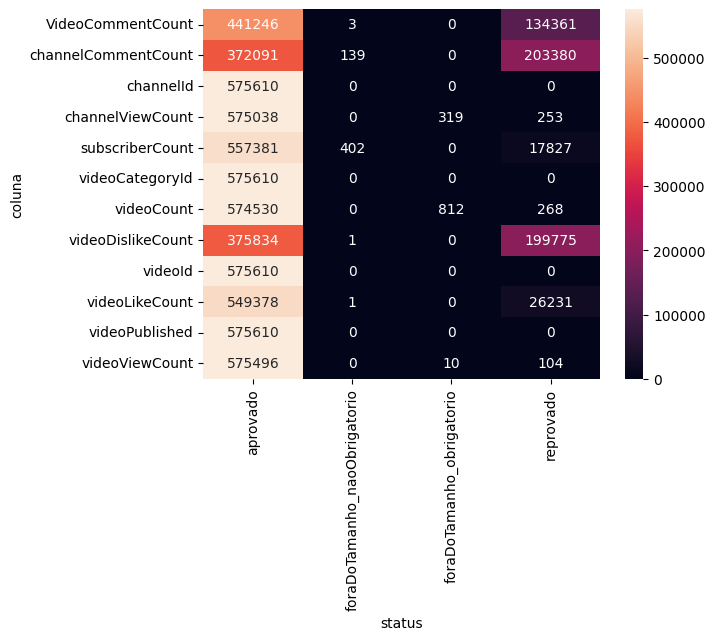

In [22]:
#Criando tabela de frequencia cruzada
cross_tab = pd.crosstab(index=df['coluna'], columns=df['status'])

#Usando o heatmap para exibir o gráfico
sns.heatmap(cross_tab, annot=True, fmt='d')
plt.show()
